In [1]:
import mysql.connector as connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
host = 'localhost'
user = 'root'
password = '123456'
database = 'imdb'

In [3]:
def connect_to_mysql():
    """
    This function uses the configuration from config.py file and returns a connection the mysql. if stocks_db doesn't
    exists it create one according to stock_prices.sql file.
    :return: a connection at the stacks_db database:
    """
    con = connector.connect(host=host, user=user, password=password, database=database)
    return con

In [4]:
def send_statement(con, statement):
    """
    This function receives statement and connection and runs the statement. it return the return from that statement
    :param statement: String to be run on the db
    :param con: A connection object to the sql
    :return: the return from the db
    """
    cursor = con.cursor()
    cursor.execute(statement)
    return list(cursor)

In [12]:
def get_tables(con):
    """
    This function receives a connection and returns a list of the columns in that table
    :param con: A connection object to the sql
    :return: A list containing the tables in the db
    """
    quarry = f"SHOW TABLES"
    tables_tuple = send_statement(con, quarry)
    return [column[0] for column in tables_tuple]

In [5]:
def get_columns(con, table):
    """
    This function receives a connection and a table and returns a list of the columns in that table
    :param con: A connection object to the sql
    :param table: A table to collect the columns from
    :return: A list containing the columns in the list
    """
    quarry = f"SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = N'{table}'"
    columns_tuple = send_statement(con, quarry)
    return [column[0] for column in columns_tuple]

In [6]:
def get_quarry(table, columns="*", limit=None, where=None, order=None, desc=False):
    """
    This function generates a SQL quarry accordion to the input parameters
    """
    if columns:
        columns_quarry = f"{', '.join(columns)}"
    else:
        columns_quarry = "*"
    if where:
        where_quarry = f"WHERE {where}"
    else:
        where_quarry = ""
    if limit:
        limit_quarry = f'LIMIT {limit}'
    else:
        limit_quarry = ""
    if order:
        order_quarry = f"ORDER BY {order}"
        if desc:
            order_quarry += " DESC"
    else:
        order_quarry = ""
    quarry = f"SELECT {columns_quarry} FROM {table} {where_quarry} {order_quarry} {limit_quarry};"
    return quarry

In [7]:
    table = 'salaries'
    con = connect_to_mysql()
    quarry = """select m.genre, COUNT(DISTINCT a.id) from movies as m
                inner join cast as c on c.movie_id=m.id
                inner join actors as a on c.actor_id=a.id
                group by m.genre
                order by COUNT(DISTINCT a.id) DESC"""
    results = send_statement(con, quarry)

In [8]:
movies = [row[0] for row in results]
num_cast = [row[1] for row in results]

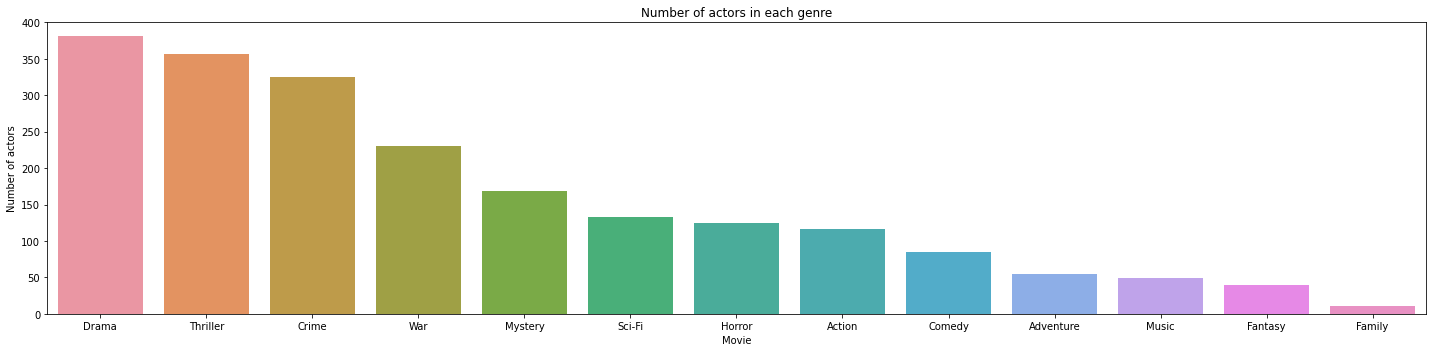

In [9]:
plt.figure(figsize=(20,5))
sns.barplot(movies, num_cast)
plt.title("Number of actors in each genre");
plt.xlabel("Movie")
plt.ylabel("Number of actors")
plt.tight_layout()
plt.show()

In [16]:
    table = 'salaries'
    con = connect_to_mysql()
    quarry = """SELECT m.title, sum(c.salary) FROM cast AS c
                INNER JOIN movies AS m ON c.movie_id=m.id
                group by m.id"""
    results = send_statement(con, quarry)
    total_salaries = [int(row[1]) for row in results]

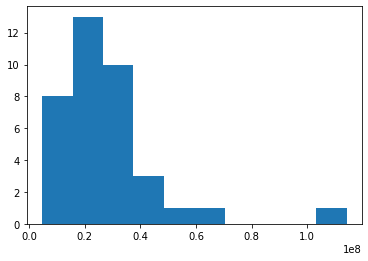

In [20]:
plt.hist(total_salaries, bins=10)
plt.show()